# Flight Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_excel(r"flight_train_data.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
data["Journey_Date"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.day
data["Journey_Month"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [9]:
data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [10]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"],axis=1,inplace=True)

In [11]:
data["Arr_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arr_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop(["Arrival_Time"],axis=1,inplace=True)

In [12]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [13]:
d = list(data["Duration"])
for i in range(len(d)):
    if len(d[i].split()) !=2:
        if "h" in d[i]:
            d[i] = d[i].strip() + " 0m"
        else:
            d[i] = "0h " + d[i]

d_hour = []
d_min = []
for i in range(len(d)):
    d_hour.append(int(d[i].split(sep = "h")[0]))
    d_min.append(int(d[i].split(sep = "m")[0].split()[-1]))

data["Duration_hour"] = d_hour
data["Duration_min"] = d_min

In [14]:
data.drop(["Duration"],axis=1,inplace=True)

In [15]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [16]:
data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [17]:
data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [18]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


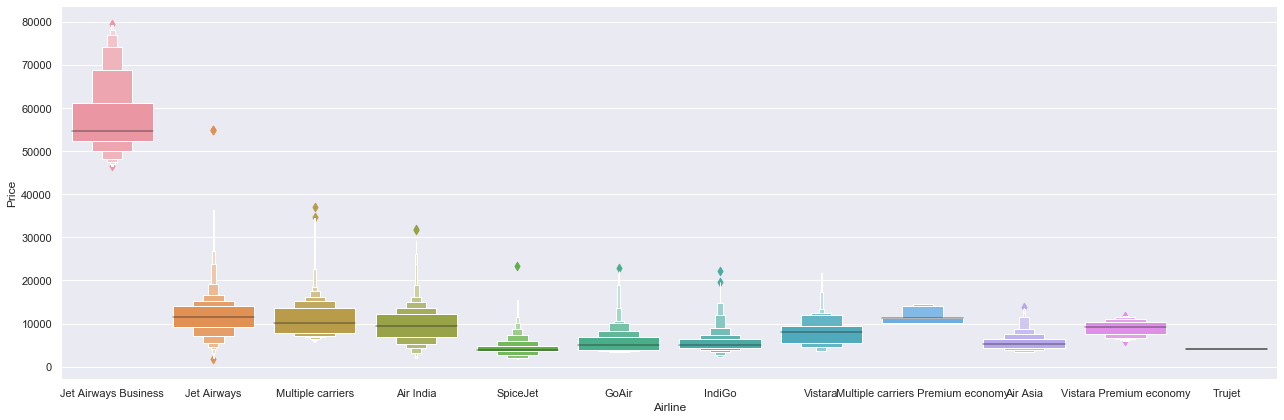

In [19]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [20]:
Airline = pd.get_dummies(data[["Airline"]],drop_first=True)

In [21]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


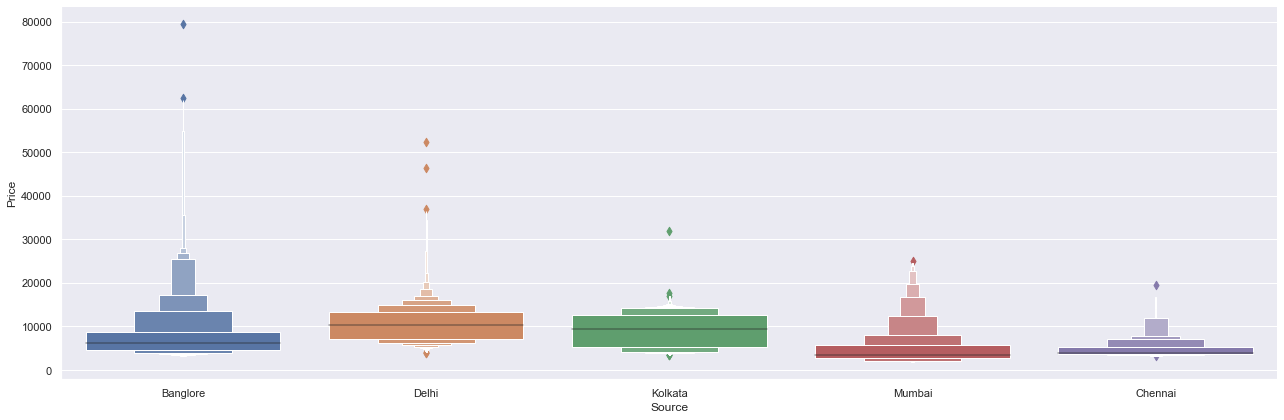

In [22]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [23]:
Source = pd.get_dummies(data[["Source"]],drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
Destination = pd.get_dummies(data[["Destination"]], drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [26]:
data_train = pd.concat([data, Airline, Source, Destination], axis = 1)
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [27]:
data_corr = data_train.corr()
data_corr["Price"].sort_values(ascending=False)

Price                                        1.000000
Total_Stops                                  0.603897
Duration_hour                                0.508778
Airline_Jet Airways                          0.416124
Source_Delhi                                 0.270676
Destination_Cochin                           0.270676
Airline_Jet Airways Business                 0.253303
Destination_New Delhi                        0.189777
Airline_Multiple carriers                    0.139793
Airline_Air India                            0.050432
Arr_hour                                     0.024244
Airline_Multiple carriers Premium economy    0.017650
Source_Kolkata                               0.009358
Dep_hour                                     0.006799
Airline_Vistara Premium economy             -0.000454
Airline_Trujet                              -0.010381
Dep_min                                     -0.024458
Airline_Vistara                             -0.060654
Arr_min                     

In [28]:
X= data_train.copy()
X.drop(["Price"],axis=1,inplace=True)
y=data_train["Price"]

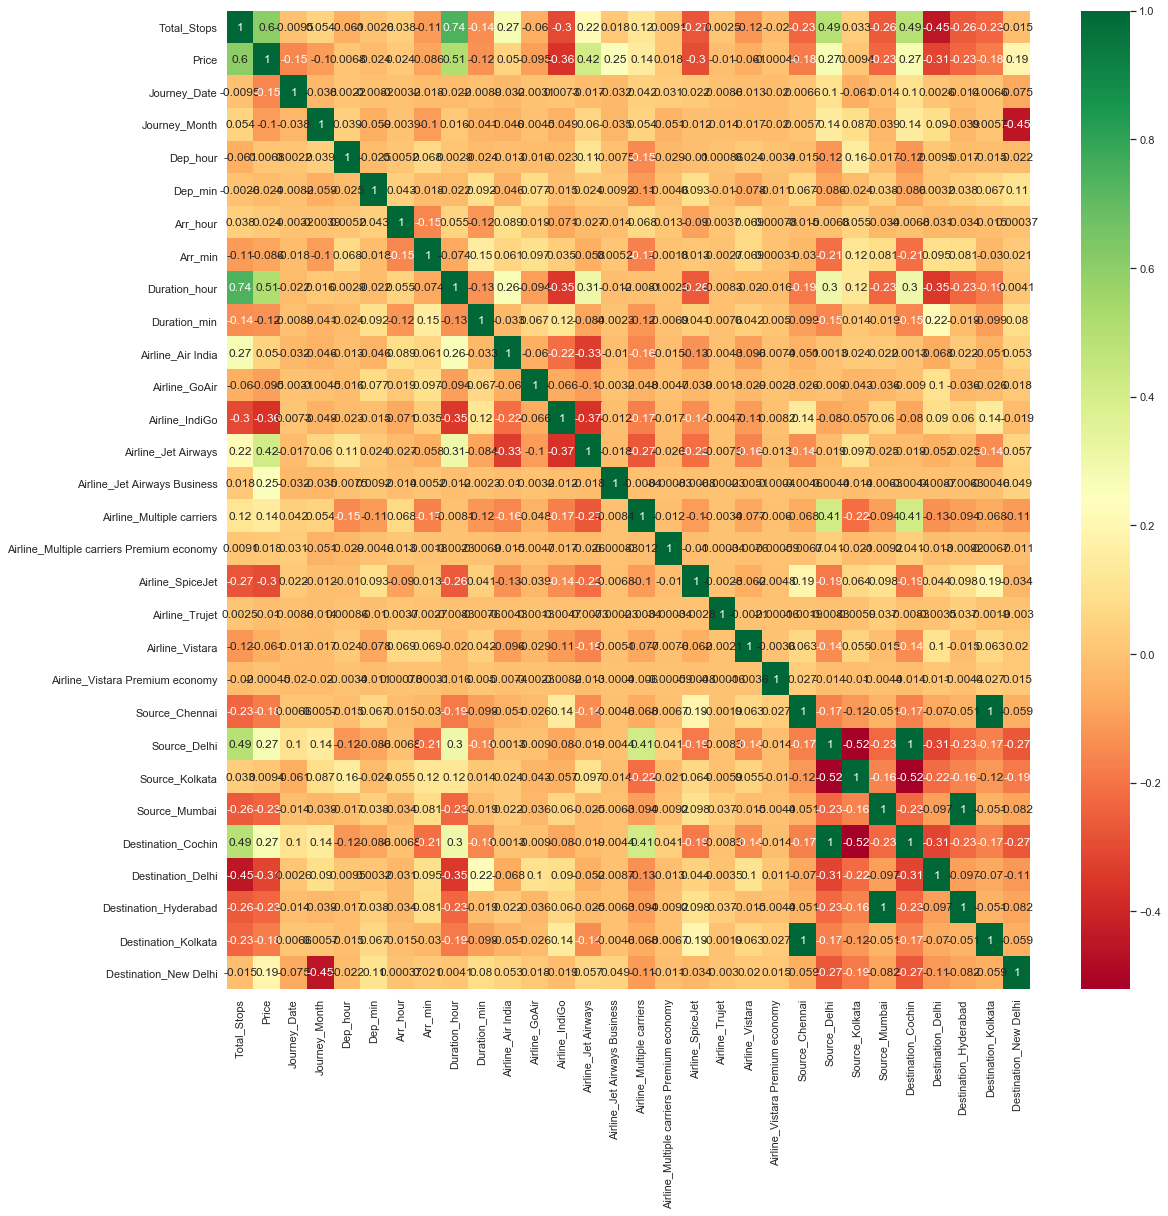

In [29]:
plt.figure(figsize = (18,18))
sns.heatmap(data_corr, annot = True, cmap = "RdYlGn")
plt.show()

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

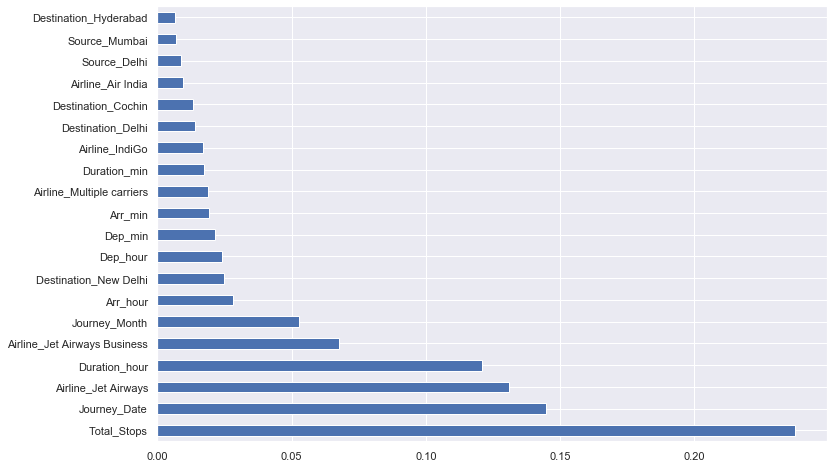

In [31]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
y_pred = reg_rf.predict(X_test)

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1171.9435846537774
MSE: 4303062.157295525
RMSE: 2074.382355617094


In [36]:
metrics.r2_score(y_test, y_pred)

0.8004335907204896

In [37]:
print(y_pred)
print(list(y_test))

[16918.26        5352.14        8906.28       ...  6624.94
 12796.62583333 12665.33983333]
[16655, 4959, 9187, 3858, 12898, 10529, 16079, 7229, 10844, 16289, 3943, 8371, 14815, 3841, 5126, 2754, 4174, 6171, 15809, 8452, 2175, 4823, 7608, 5613, 15812, 5406, 3100, 13014, 4995, 8040, 3419, 14533, 4812, 9027, 4823, 13542, 9922, 13044, 7757, 4760, 3873, 3383, 14330, 6860, 26890, 3419, 5975, 7166, 22153, 8849, 9646, 10919, 8586, 7574, 17057, 8146, 7591, 6287, 10262, 6128, 16079, 9134, 3943, 7229, 16736, 10262, 7952, 6017, 14053, 10824, 5613, 4990, 6121, 3841, 12537, 8016, 4273, 8620, 13307, 11087, 5621, 12287, 10368, 9922, 5177, 7354, 3543, 12819, 14939, 13377, 3419, 6513, 10741, 13817, 4823, 8372, 4050, 12898, 3597, 14781, 5678, 10844, 7893, 10262, 26890, 4804, 4777, 6206, 5054, 15129, 10844, 3175, 15129, 7191, 13677, 11491, 15812, 3850, 11228, 8586, 13067, 4423, 10027, 7268, 4508, 5198, 4880, 4886, 5775, 4030, 5626, 7530, 8372, 10203, 8372, 13310, 26890, 13759, 8586, 7673, 10231, 3873, 674

In [38]:
import pickle
file = open('flight.pkl','wb')
pickle.dump(reg_rf,file)

In [40]:
data_train.loc[2,:]

Total_Stops                                      2
Price                                        13882
Journey_Date                                     9
Journey_Month                                    6
Dep_hour                                         9
Dep_min                                         25
Arr_hour                                         4
Arr_min                                         25
Duration_hour                                   19
Duration_min                                     0
Airline_Air India                                0
Airline_GoAir                                    0
Airline_IndiGo                                   0
Airline_Jet Airways                              1
Airline_Jet Airways Business                     0
Airline_Multiple carriers                        0
Airline_Multiple carriers Premium economy        0
Airline_SpiceJet                                 0
Airline_Trujet                                   0
Airline_Vistara                